In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df['Family']=df['SibSp']+df['Parch']
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [5]:
df=df[['Age','Fare','Family','Survived']]

In [6]:
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [9]:
df.isnull().sum()

Age         177
Fare          0
Family        0
Survived      0
dtype: int64

In [10]:
df.isnull().mean()

Age         0.198653
Fare        0.000000
Family      0.000000
Survived    0.000000
dtype: float64

In [13]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [17]:
X_train.isnull().mean()

Age       0.207865
Fare      0.000000
Family    0.000000
dtype: float64

In [18]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()
mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()


In [20]:
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)
X_train['Fare_median']=X_train['Fare'].fillna(median_fare)                                          
                                             

In [21]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
295,NaN,27.7208,0,29.785904,28.75,27.7208,27.7208
823,27.0,12.4750,1,27.000000,27.00,12.4750,12.4750
95,NaN,8.0500,0,29.785904,28.75,8.0500,8.0500
571,53.0,51.4792,2,53.000000,53.00,51.4792,51.4792
223,NaN,7.8958,0,29.785904,28.75,7.8958,7.8958


In [23]:
#Age
print('original Age variablr variance:',X_train['Age'].var())
print('Age variance after mean Imputation:',X_train['Age_mean'].var())
print('Age variance after median Imputation:',X_train['Age_median'].var())
#Fare
print('original Fare variablr variance:',X_train['Fare'].var())
print('Fare variance after mean Imputation:',X_train['Fare_mean'].var())
print('Fare variance after median Imputation:',X_train['Fare_median'].var())

original Age variablr variance: 204.3495133904614
Age variance after mean Imputation: 161.81262452718673
Age variance after median Imputation: 161.9895663346054
original Fare variablr variance: 2368.2468324201386
Fare variance after mean Imputation: 2368.2468324201386
Fare variance after median Imputation: 2368.2468324201386


<Axes: ylabel='Density'>

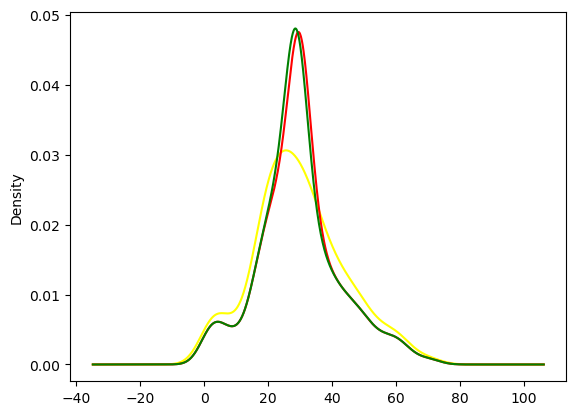

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variable distribution of Age
X_train['Age'].plot(kind='kde',ax=ax,color='yellow')

#Age Imputation with mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')

#Age Imputation with median
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')

<Axes: ylabel='Density'>

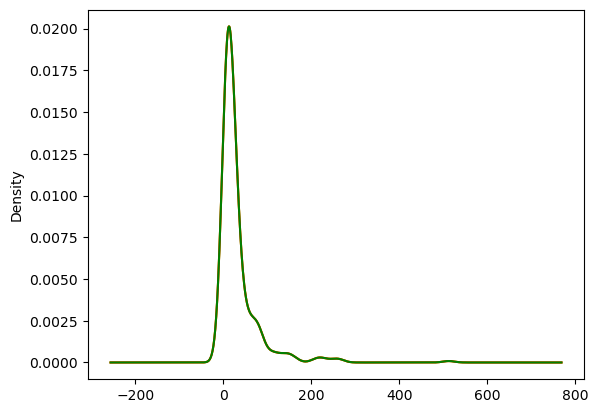

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variable distribution of Age
X_train['Fare'].plot(kind='kde',ax=ax,color='yellow')

#Age Imputation with mean
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')

#Age Imputation with median
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')

In [27]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,71.512440,-6.498901,204.349513,204.349513,71.512440,71.512440
Fare,71.512440,2368.246832,16.847264,56.626587,58.986531,2368.246832,2368.246832
Family,-6.498901,16.847264,2.735252,-5.146106,-5.112563,16.847264,16.847264
Age_mean,204.349513,56.626587,-5.146106,161.812625,161.812625,56.626587,56.626587
Age_median,204.349513,58.986531,-5.112563,161.812625,161.989566,58.986531,58.986531
Fare_mean,71.512440,2368.246832,16.847264,56.626587,58.986531,2368.246832,2368.246832
Fare_median,71.512440,2368.246832,16.847264,56.626587,58.986531,2368.246832,2368.246832


In [28]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.095814,-0.299113,1.000000,1.000000,0.095814,0.095814
Fare,0.095814,1.000000,0.209323,0.091475,0.095235,1.000000,1.000000
Family,-0.299113,0.209323,1.000000,-0.244610,-0.242883,0.209323,0.209323
Age_mean,1.000000,0.091475,-0.244610,1.000000,0.999454,0.091475,0.091475
Age_median,1.000000,0.095235,-0.242883,0.999454,1.000000,0.095235,0.095235
Fare_mean,0.095814,1.000000,0.209323,0.091475,0.095235,1.000000,1.000000
Fare_median,0.095814,1.000000,0.209323,0.091475,0.095235,1.000000,1.000000


<Axes: >

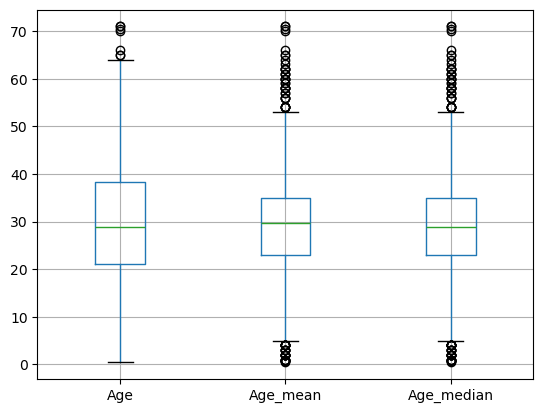

In [29]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

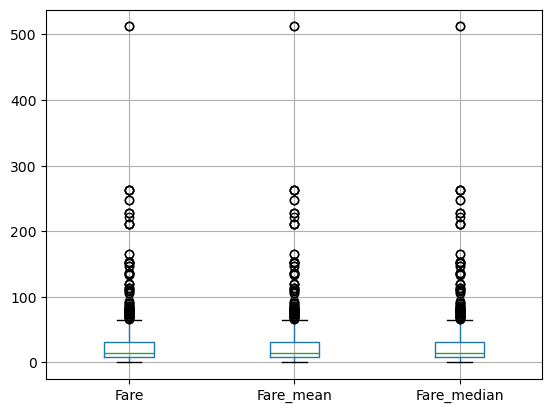

In [30]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# above using sklearn

In [31]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
from sklearn.impute import SimpleImputer
impute1=SimpleImputer(strategy='median')
impute2=SimpleImputer(strategy='mean')

In [33]:
from sklearn.compose import ColumnTransformer
trf=ColumnTransformer([
    ('impute1',impute1,X_train['Age']),
    ('impute2',impute2,X_train['Fare'])
    
],remainder='passthrough')

In [43]:
trf.fit(X_train)
trf.transform(X_train)
trf.transform(X_test)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

# Arbitary Value Imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df['Family']=df['SibSp']+df['Parch']
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [5]:
df=df[['Age','Fare','Family','Survived']]

In [6]:
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().sum()

Age         177
Fare          0
Family        0
Survived      0
dtype: int64

In [9]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
X_train['Age_99']=X_train['Age'].fillna(99)
X_train['Age_minus1']=X_train['Age'].fillna(-1)
X_train['Fare_999']=X_train['Fare'].fillna(999)
X_train['Fare_minus1']=X_train['Fare'].fillna(-1) 

In [12]:
#Age
print('original Age variablr variance:',X_train['Age'].var())
print('Age variance after fillna(99) Imputation:',X_train['Age_99'].var())
print('Age variance after fillna(-1) Imputation:',X_train['Age_minus1'].var())
#Fare
print('original Fare variablr variance:',X_train['Fare'].var())
print('Fare variance after fillna(999) Imputation:',X_train['Fare_999'].var())
print('Fare variance after fillna(-1) Imputation:',X_train['Fare_minus1'].var())

original Age variablr variance: 204.3495133904614
Age variance after fillna(99) Imputation: 951.7275570187172
Age variance after fillna(-1) Imputation: 318.0896202624484
original Fare variablr variance: 2368.2468324201386
Fare variance after fillna(999) Imputation: 2368.2468324201386
Fare variance after fillna(-1) Imputation: 2368.2468324201386


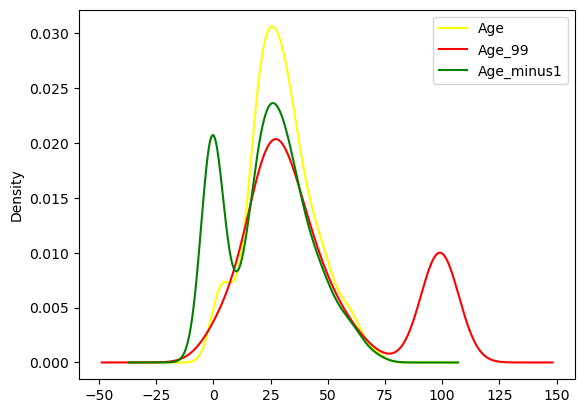

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variable distribution of Age
X_train['Age'].plot(kind='kde',ax=ax,color='yellow')

#Age Imputation with mean
X_train['Age_99'].plot(kind='kde',ax=ax,color='red')

#Age Imputation with median
X_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')

plt.legend()

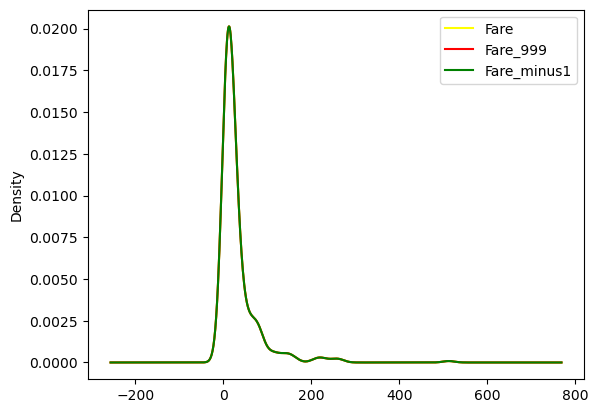

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variable distribution of Age
X_train['Fare'].plot(kind='kde',ax=ax,color='yellow')

#Age Imputation with mean
X_train['Fare_999'].plot(kind='kde',ax=ax,color='red')

#Age Imputation with median
X_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

plt.legend()